In [10]:
# Parameters
num_data = 30000
# openAI_key = ''


### Part 1 - Data Analysis

Processing Documents: 100%|██████████| 30000/30000 [21:57<00:00, 22.77it/s]  



--- Extracted PII Data (Sample) ---
Sample 1: {'GPE': ['Chicago', 'Georgia', 'Harrisburg', 'Georgia', 'Cleveland', 'Tennessee', 'CLEVELAND', 'Tennessee', 'States'], 'PERSON': ['Ray', 'Ray', 'Ray', 'Doppler', 'Ray', 'Ray', 'Ray'], 'LOC': ['South']}
Sample 2: {'PERSON': ['Jian'], 'GPE': ['Toronto']}
Sample 3: {'PERSON': ['Clara', 'Clara'], 'GPE': ['Kennewick', 'Clara', 'Pasco', 'Spokane'], 'PHONE_NUMBER': ['5093802321']}
PII Counts by Type:
       PII Type   Count
0           GPE   92194
1        PERSON  114850
2           LOC    7540
3  PHONE_NUMBER    9459
4         EMAIL    1851
5    IP_ADDRESS     198


C:\Users\terry\AppData\Local\Temp\ipykernel_166996\2556060017.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pii_counts_df, x='PII Type', y='Count', palette='Blues_d')


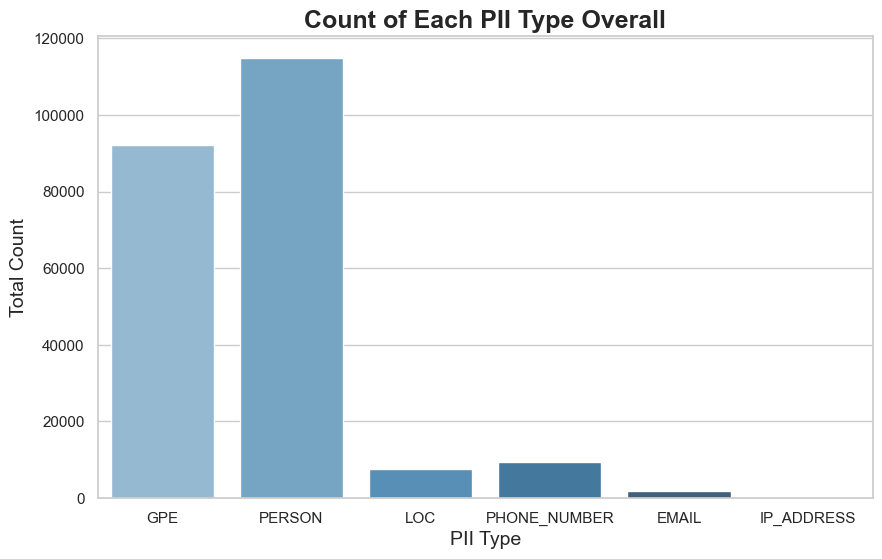

C:\Users\terry\AppData\Local\Temp\ipykernel_166996\2556060017.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pii_rate_df, x='PII Type',



Rate of Each PII Type Occurring in Documents:
       PII Type  Documents with PII  Rate per Document (%)
0           GPE               16944              56.480000
1        PERSON               18871              62.903333
2           LOC                3649              12.163333
3  PHONE_NUMBER                3689              12.296667
4         EMAIL                1302               4.340000
5    IP_ADDRESS                  75               0.250000


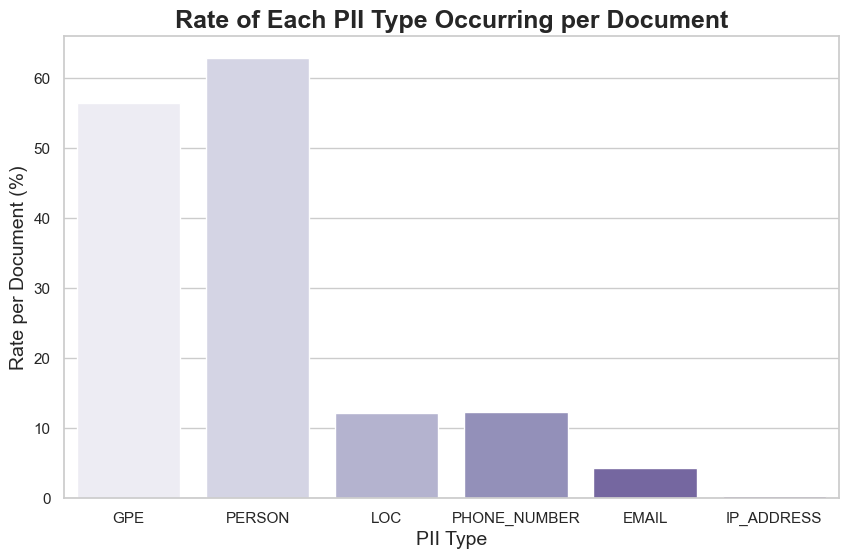


Top 300 Entities for PII Type 'GPE':
China: 1509
America: 1366
Washington: 1327
California: 1323
Canada: 1119
London: 1046
Florida: 1021
Japan: 976
Israel: 954
Texas: 925
Australia: 915
India: 909
Chicago: 861
France: 744
England: 691
Iraq: 664
Boston: 595
Germany: 575
Ohio: 574
USA: 559
Paris: 487
Georgia: 472
Italy: 467
Arizona: 454
Mexico: 446
Toronto: 442
Seattle: 440
Iran: 438
Russia: 433
Colorado: 429
Spain: 420
Ireland: 416
Michigan: 415
Dallas: 413
Syria: 403
Hollywood: 396
Britain: 395
Miami: 390
Portland: 389
Virginia: 386
Alabama: 383
Atlanta: 381
Brazil: 374
Massachusetts: 359
Houston: 358
Philadelphia: 353
Wisconsin: 353
Pakistan: 352
Afghanistan: 349
Utah: 334
Minnesota: 333
Maryland: 329
Tennessee: 325
Pennsylvania: 325
Illinois: 325
Turkey: 323
Denver: 315
Oregon: 313
Detroit: 310
Iowa: 297
Egypt: 297
Hawaii: 295
Connecticut: 269
Alaska: 263
Kansas: 263
Greece: 263
Oklahoma: 262
Indiana: 261
Kyrgyzstan: 257
Pittsburgh: 254
Kentucky: 248
Ontario: 242
Missouri: 235
Balti

C:\Users\terry\AppData\Local\Temp\ipykernel_166996\2556060017.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(entities), y=list(counts),


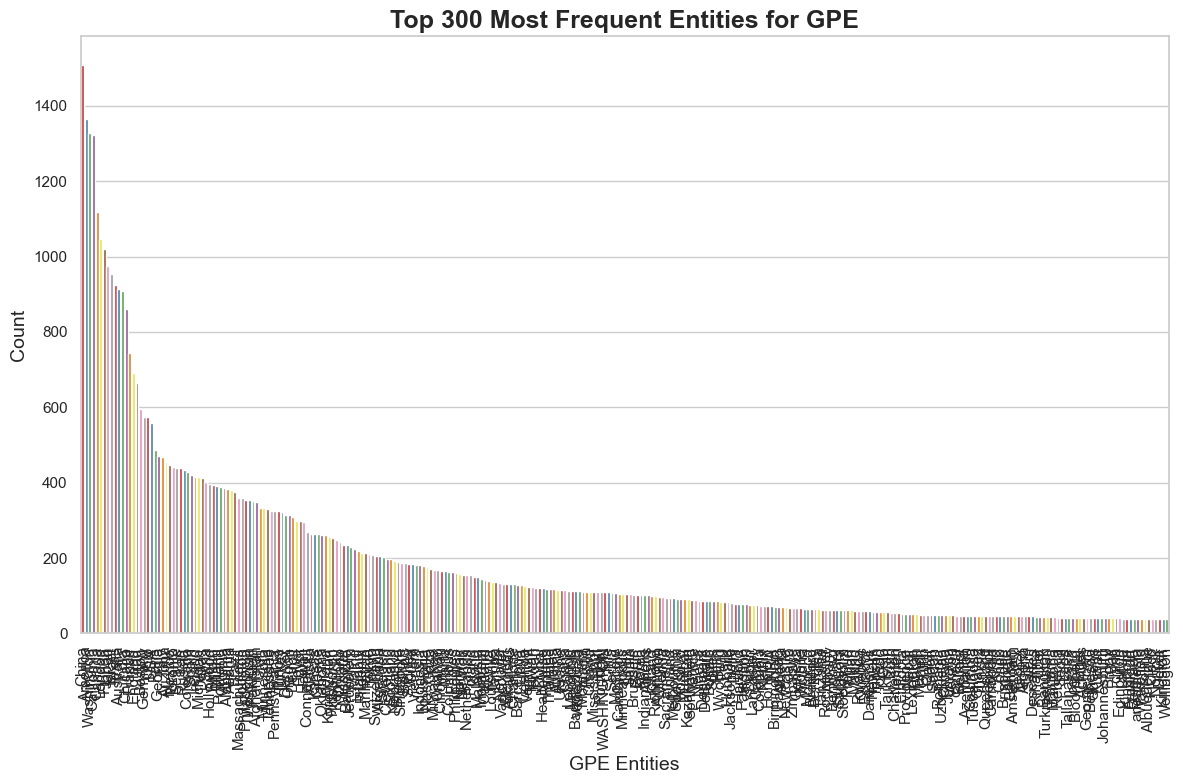

C:\Users\terry\AppData\Local\Temp\ipykernel_166996\2556060017.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(entities), y=list(counts),


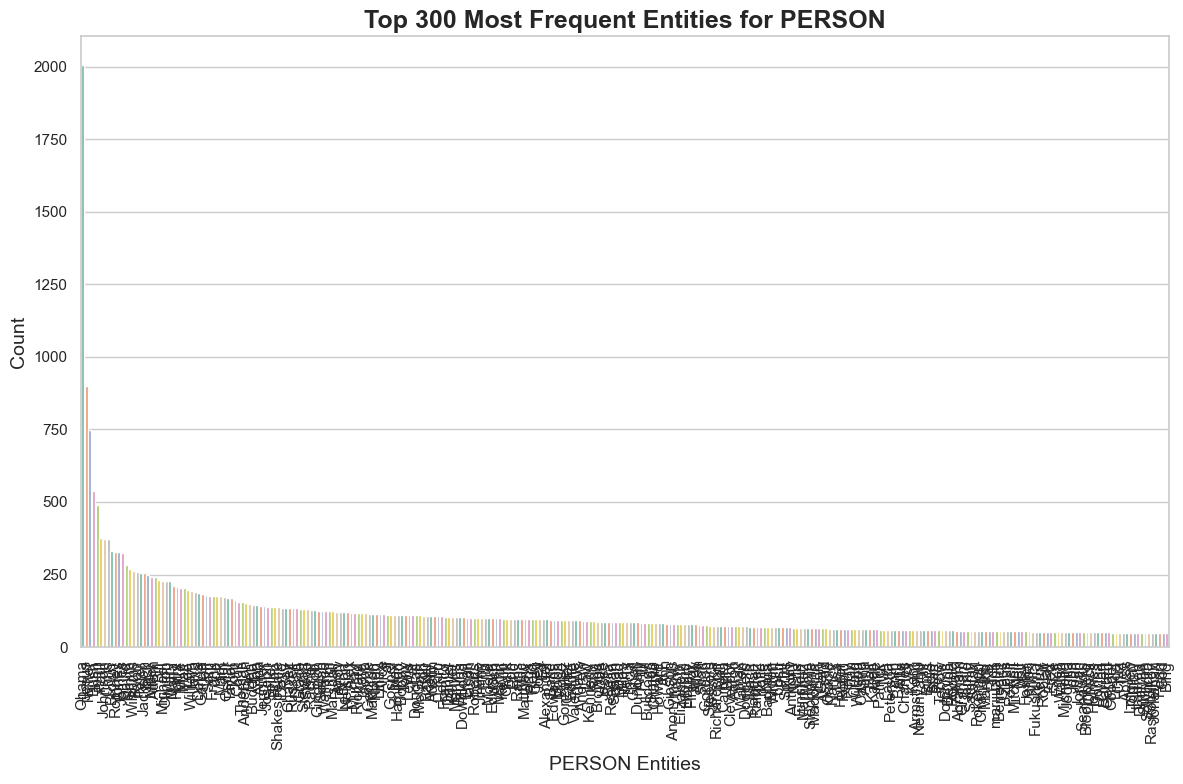

C:\Users\terry\AppData\Local\Temp\ipykernel_166996\2556060017.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(entities), y=list(counts),


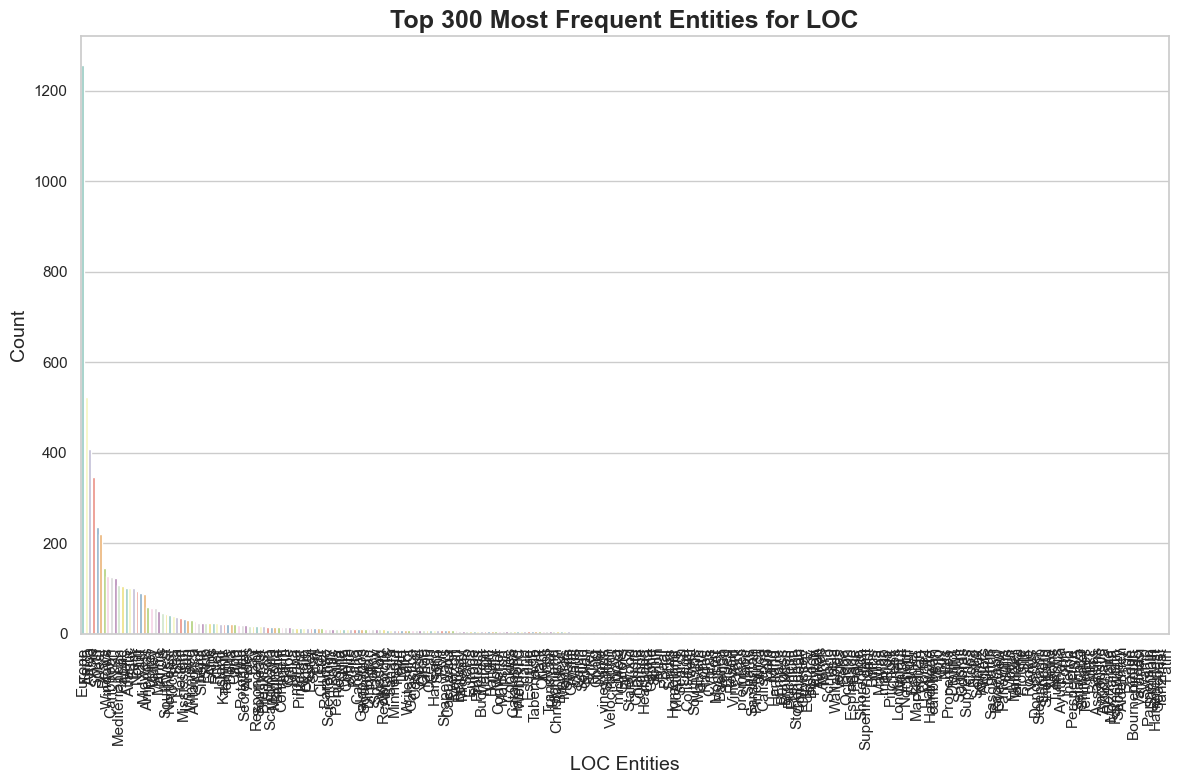

C:\Users\terry\AppData\Local\Temp\ipykernel_166996\2556060017.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(entities), y=list(counts),


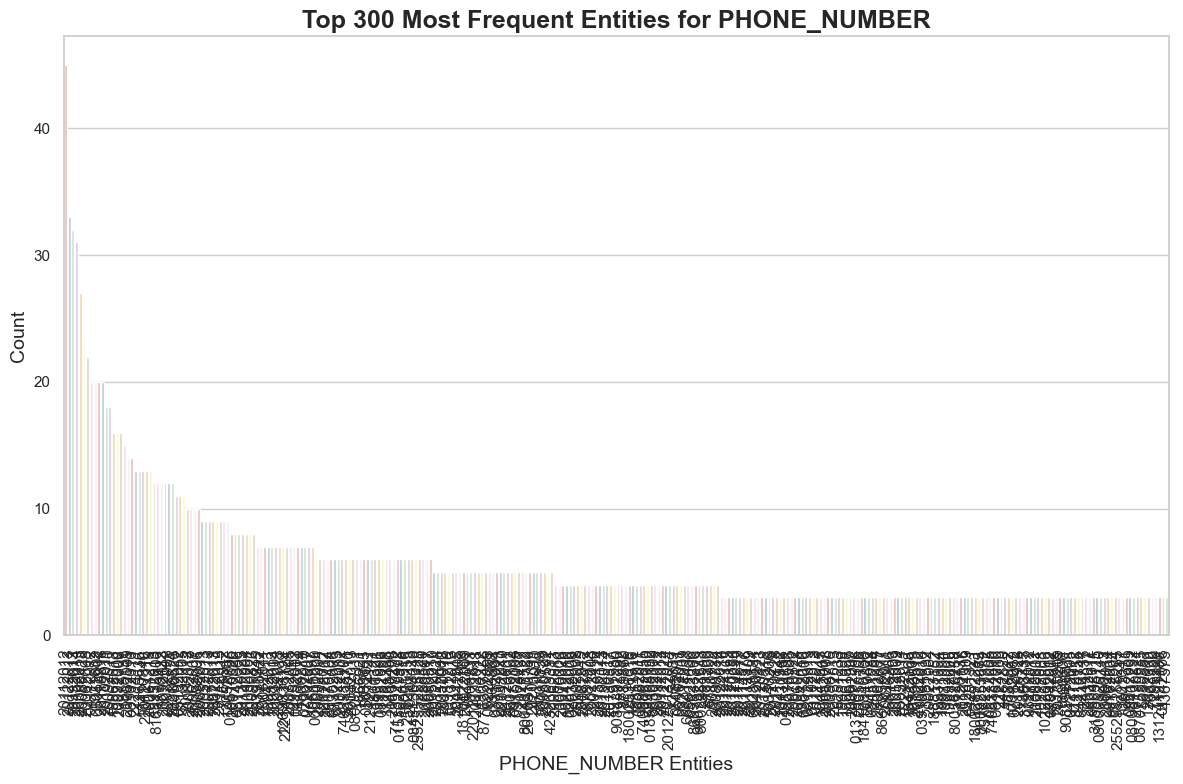

C:\Users\terry\AppData\Local\Temp\ipykernel_166996\2556060017.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(entities), y=list(counts),


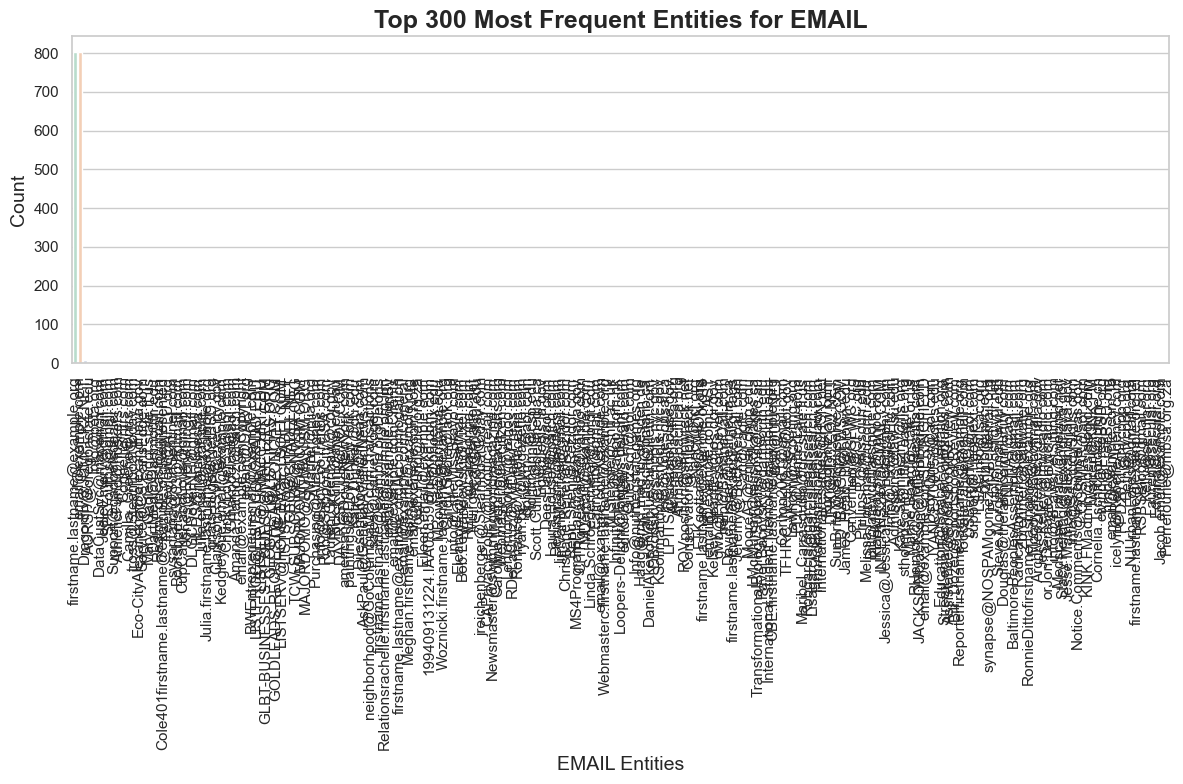

C:\Users\terry\AppData\Local\Temp\ipykernel_166996\2556060017.py:192: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(entities), y=list(counts),


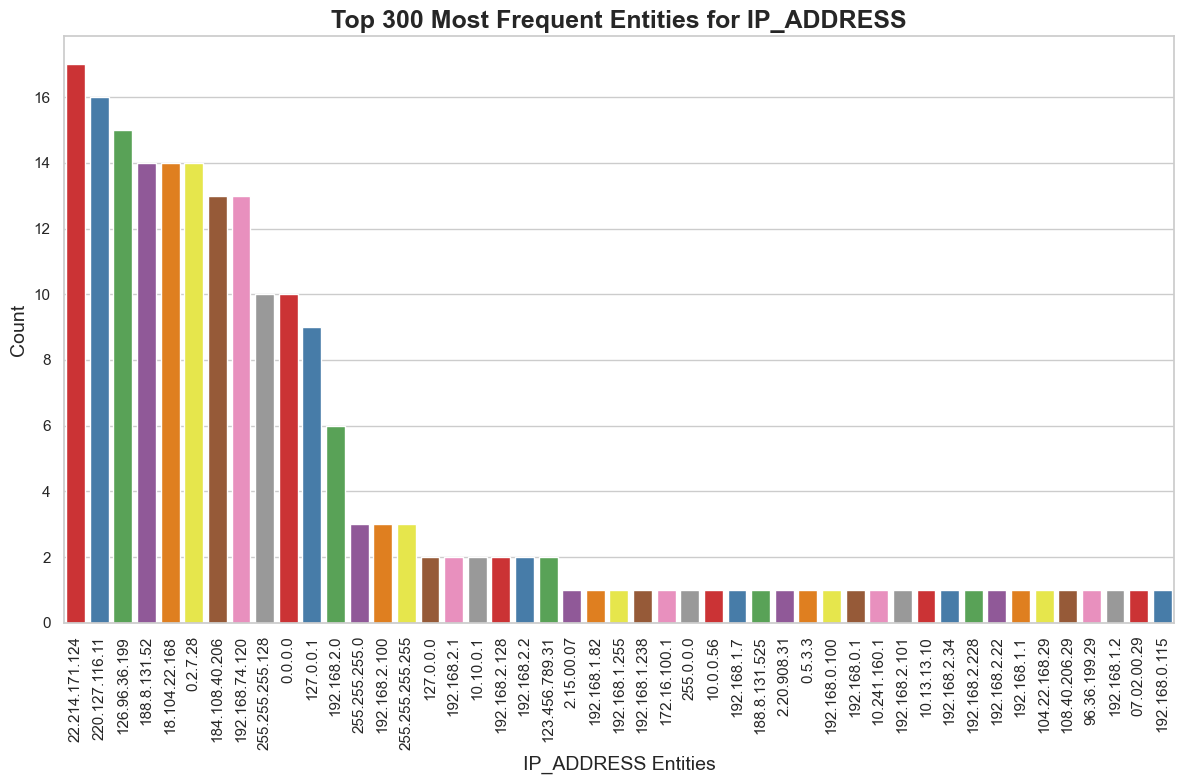


Top 10 Most Frequent PII Type Combinations:
GPE + PERSON: 12772
GPE + LOC: 3038
LOC + PERSON: 3002
GPE + LOC + PERSON: 2634
PERSON + PHONE_NUMBER: 2454
GPE + PHONE_NUMBER: 2436
GPE + PERSON + PHONE_NUMBER: 1855
EMAIL + PERSON: 885
EMAIL + GPE: 847
EMAIL + GPE + PERSON: 659


C:\Users\terry\AppData\Local\Temp\ipykernel_166996\2556060017.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(combo_labels), y=list(counts), palette='coolwarm')


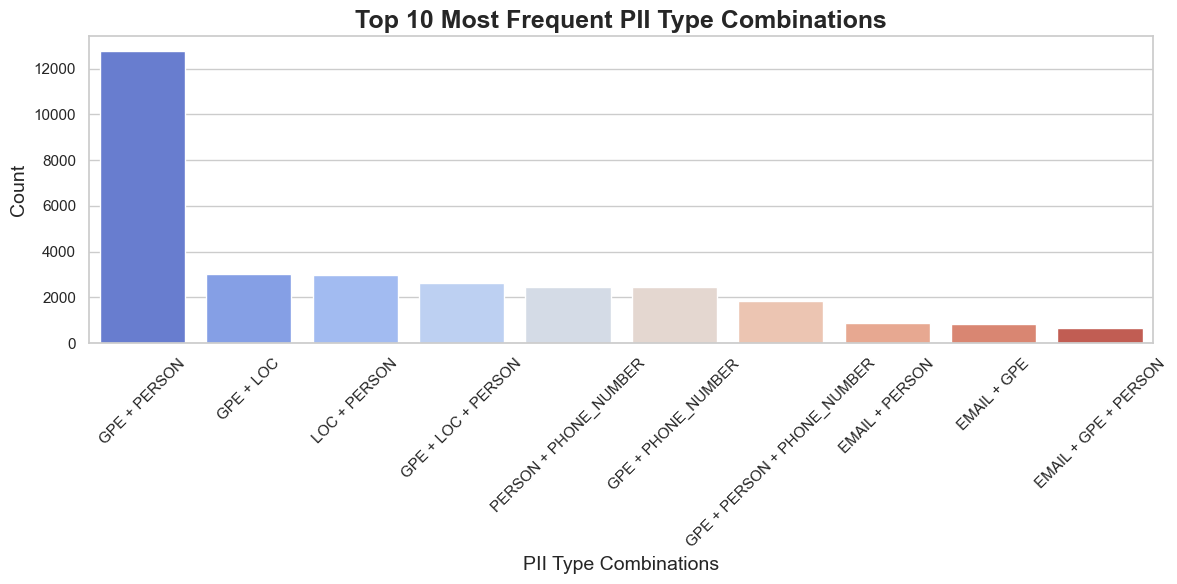

In [11]:
from scipy.stats import linregress
import numpy as np
import math
import openai
import os
import seaborn as sns
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import re
from datasets import load_dataset
import spacy
from collections import Counter
import itertools
from tqdm import tqdm

# Load the English model in spaCy
nlp = spacy.load("en_core_web_sm")
# Load the dataset in streaming mode
dataset = load_dataset("HuggingFaceFW/fineweb", split='train', streaming=True)
pii_counts = Counter()
pii_values = Counter()
pii_counts_per_doc = []
extracted_pii_data = []

# Regex patterns for additional PII types
email_pattern = re.compile(r'\b[\w.%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
phone_pattern = re.compile(
    r'\b(?:\+?(\d{1,3})?[-.\s]?(\d{1,4})[-.\s]?(\d{1,4})[-.\s]?(\d{1,9}))\b')
ip_pattern = re.compile(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b')


def is_valid_pii(entity, entity_type):
    if entity_type == 'PERSON':
        return entity.isalpha() and len(entity) > 1  # Basic name validation
    elif entity_type == 'PHONE_NUMBER':
        # Check if the phone number has at least 7 digits (adjust as needed)
        # Remove non-numeric characters
        digits_only = re.sub(r'\D', '', entity)
        return len(digits_only) >= 7  # Require at least 7 digits to be valid
    elif entity_type == 'EMAIL':
        # Valid email format
        return re.match(r'^[\w\.-]+@[\w\.-]+\.\w+$', entity)
    elif entity_type == 'IP_ADDRESS':
        return re.match(r'^\d{1,3}(\.\d{1,3}){3}$', entity)  # Simple IP format
    elif entity_type in ['LOC', 'GPE']:
        # Exclude short numbers, generic codes, etc.
        return entity.isalpha() and len(entity) > 2
    return True

# Processing documents with tqdm
for sample in tqdm(itertools.islice(dataset, num_data), total=num_data, desc="Processing Documents"):
    text = sample['text']
    pii_count_in_doc = 0
    sample_pii = {'text': text, 'extracted_pii': {}}

    # Extract PII using spaCy for names, locations
    doc = nlp(text)
    for ent in doc.ents:
        if ent.label_ in ['PERSON', 'GPE', 'LOC'] and is_valid_pii(ent.text, ent.label_):
            pii_counts[ent.label_] += 1
            pii_values[ent.text] += 1
            pii_count_in_doc += 1
            if ent.label_ not in sample_pii['extracted_pii']:
                sample_pii['extracted_pii'][ent.label_] = []
            sample_pii['extracted_pii'][ent.label_].append(ent.text)

    # Extract PII using regex for emails, phone numbers, IP addresses
    for pattern, label in [(email_pattern, 'EMAIL'), (phone_pattern, 'PHONE_NUMBER'), (ip_pattern, 'IP_ADDRESS')]:
        matches = pattern.findall(text)
        flattened_matches = [''.join(match) if isinstance(
            match, tuple) else match for match in matches]
        for match in flattened_matches:
            if is_valid_pii(match, label):
                pii_counts[label] += 1
                pii_values[match] += 1
                pii_count_in_doc += 1
                if label not in sample_pii['extracted_pii']:
                    sample_pii['extracted_pii'][label] = []
                sample_pii['extracted_pii'][label].append(match)

    pii_counts_per_doc.append(pii_count_in_doc)
    extracted_pii_data.append(sample_pii)

# Metrics and data for visualization
metrics = {
    'PII Counts by Type': pii_counts,
    'Top PII Instances': pii_values.most_common(10),
    'PII Counts per Document': pii_counts_per_doc,
    'Extracted PII Data': extracted_pii_data
}

# Display extracted PII data (example)
print("\n--- Extracted PII Data (Sample) ---")
# Display first 3 samples
for i, pii_data in enumerate(extracted_pii_data[:3]):
    print(f"Sample {i+1}: {pii_data['extracted_pii']}")


# Ensure plots display within the notebook (if using Jupyter)
%matplotlib inline

# Create the output directory if it doesn't exist
os.makedirs('./pics', exist_ok=True)

# Set general plot style for all plots
sns.set(style="whitegrid")


# 1. Calculate General Statistics
pii_counts = metrics['PII Counts by Type'] # Extract PII counts by type from metrics

# Convert to a pandas DataFrame for easier plotting
pii_counts_df = pd.DataFrame.from_dict(
    pii_counts, orient='index', columns=['Count']).reset_index()
pii_counts_df.rename(columns={'index': 'PII Type'}, inplace=True)

# Display the DataFrame
print("PII Counts by Type:")
print(pii_counts_df)

# Bar chart for PII counts by type
plt.figure(figsize=(10, 6))
sns.barplot(data=pii_counts_df, x='PII Type', y='Count', palette='Blues_d')
plt.title('Count of Each PII Type Overall', fontsize=18, fontweight='bold')
plt.xlabel('PII Type', fontsize=14)
plt.ylabel('Total Count', fontsize=14)
plt.savefig('./pics/pii_count_by_type.pdf', format='pdf')
plt.show()

# Rate of Each PII Type Occurring Per Document
# Total number of documents processed
total_documents = len(extracted_pii_data)

# Calculate the rate (number of documents containing each PII type divided by total documents)
pii_document_counts = Counter()
for sample in extracted_pii_data:
    for pii_type in sample['extracted_pii'].keys():
        pii_document_counts[pii_type] += 1

# Convert to DataFrame
pii_rate_df = pd.DataFrame.from_dict(pii_document_counts, orient='index', columns=[
                                     'Documents with PII']).reset_index()
pii_rate_df.rename(columns={'index': 'PII Type'}, inplace=True)
pii_rate_df['Rate per Document (%)'] = (
    pii_rate_df['Documents with PII'] / total_documents) * 100

# Display the DataFrame
print("\nRate of Each PII Type Occurring in Documents:")
print(pii_rate_df)

# Bar chart for PII rate per document
plt.figure(figsize=(10, 6))
sns.barplot(data=pii_rate_df, x='PII Type',
            y='Rate per Document (%)', palette='Purples')
plt.title('Rate of Each PII Type Occurring per Document',
          fontsize=18, fontweight='bold')
plt.xlabel('PII Type', fontsize=14)
plt.ylabel('Rate per Document (%)', fontsize=14)
plt.savefig('./pics/pii_rate_per_document.pdf', format='pdf')
plt.show()

# 2. Identify Most Common Individual Entities for Each PII Type
# Initialize a dictionary to hold counts for each PII type
pii_entity_counts = {}

# Iterate over extracted PII data to collect entity counts
for sample in extracted_pii_data:
    for pii_type, entities in sample['extracted_pii'].items():
        if pii_type not in pii_entity_counts:
            pii_entity_counts[pii_type] = Counter()
        pii_entity_counts[pii_type].update(entities)

# For each PII type, get the top 300 entities
top_entities_per_pii = {}
for pii_type, counter in pii_entity_counts.items():
    top_entities_per_pii[pii_type] = counter.most_common(
        300)  # Changed to top 300

# Display the top entities
for pii_type, top_entities in top_entities_per_pii.items():
    print(f"\nTop 300 Entities for PII Type '{pii_type}':")
    for entity, count in top_entities:
        print(f"{entity}: {count}")

# Plotting the top 300 entities for each PII type
valid_palettes = ['Set1', 'Set2', 'Set3', 'Pastel1', 'Pastel2']
for i, (pii_type, top_entities) in enumerate(top_entities_per_pii.items()):
    # Prepare data
    entities, counts = zip(*top_entities)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=list(entities), y=list(counts),
                palette=valid_palettes[i % len(valid_palettes)])
    plt.title(
        f"Top 300 Most Frequent Entities for {pii_type}", fontsize=18, fontweight='bold')
    plt.xlabel(f"{pii_type} Entities", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig(f'./pics/top_entities_{pii_type.lower()}.pdf', format='pdf')
    plt.savefig(f'./pics/top_entities_{pii_type.lower()}.png', format='pdf')
    plt.show()

# 3. Determine Common PII Type Combinations

# Initialize a Counter for combinations
combination_counts = Counter()

# Iterate over each document to find combinations
for sample in extracted_pii_data:
    pii_types_in_doc = list(sample['extracted_pii'].keys())
    # Generate all possible combinations of PII types in the document
    for r in range(2, len(pii_types_in_doc) + 1):
        for combo in combinations(sorted(pii_types_in_doc), r):
            combination_counts[combo] += 1

# Get the top 10 most frequent combinations
top_combinations = combination_counts.most_common(10)

# Display the top combinations
print("\nTop 10 Most Frequent PII Type Combinations:")
for combo, count in top_combinations:
    print(f"{' + '.join(combo)}: {count}")

# Prepare data
combos, counts = zip(*top_combinations)
combo_labels = [' + '.join(combo) for combo in combos]

plt.figure(figsize=(12, 6))
sns.barplot(x=list(combo_labels), y=list(counts), palette='coolwarm')
plt.title("Top 10 Most Frequent PII Type Combinations",
          fontsize=18, fontweight='bold')
plt.xlabel("PII Type Combinations", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('./pics/top_pii_combinations.pdf', format='pdf')
plt.savefig('./pics/top_pii_combinations.png', format='pdf')
plt.show()


#### Extract Probabilities

**With OpenAI (GPT-4o)** 

It might result in API error, this is due to the change of obselete model of OpenAI over the past days. Unfortunately, I cannot control it. If you run into errors, use Llama instead (code below).

In [12]:
# openai.api_key = openAI_key

# def get_average_probability(text):
#     response = openai.Completion.create(
#         model="davinci-002",  # Make sure this model is accessible and appropriate
#         prompt=text,
#         max_tokens=1,  # To ensure the prompt tokens are processed
#         logprobs=5,
#         echo=True      # Ensures the input tokens are returned with logprobs
#     )

#     # Extract log probabilities for input tokens
#     logprobs = response['choices'][0]['logprobs']
#     token_logprobs = logprobs['token_logprobs']

#     # Filter out None values from log probabilities
#     valid_logprobs = [lp for lp in token_logprobs if lp is not None]

#     if not valid_logprobs:
#         return None  # Return None if no valid log probabilities exist

#     # Calculate average log probability and convert it to probability
#     avg_log_prob = sum(valid_logprobs) / len(valid_logprobs)
#     avg_prob = math.exp(avg_log_prob)

#     return avg_prob


# # Example usage
# text = "hello world"
# average_prob = get_average_probability(text)
# print(f"Average Probability: {average_prob}")

# # %%

# data = {}

# for i, (pii_type, top_entities) in enumerate(top_entities_per_pii.items()):
#     for entity, count in zip(*top_entities):
#         prob = get_average_probability(entity)
#         data[entity] = (count, prob)

**With Llama 3** (Recommended)

In [ ]:
# from transformers import AutoModelForCausalLM, AutoTokenizer
# import torch

# model_name = "meta-llama/Llama-3.2-1B"

# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForCausalLM.from_pretrained(model_name)


In [ ]:
# def get_average_probability(text, model, tokenizer):
#     input_ids = tokenizer.encode(text, return_tensors="pt")
#     outputs = model(input_ids=input_ids)

#     logits = outputs.logits[0, -1, :]
#     probs = torch.softmax(logits, dim=-1)

#     avg_probability = probs.mean().item()
#     return avg_probability

# probability = get_average_probability("This is a sample sentence.", model, tokenizer)
# print(probability)


7.797151738486718e-06


In [ ]:
# data = {}
# for i, (pii_type, top_entities) in enumerate(top_entities_per_pii.items()):
#     print(top_entities)
#     for entity, count in tqdm(top_entities):
#         prob = get_average_probability(entity, model, tokenizer)
#         data[entity] = (count, prob)

[('China', 1509), ('America', 1366), ('Washington', 1327), ('California', 1323), ('Canada', 1119), ('London', 1046), ('Florida', 1021), ('Japan', 976), ('Israel', 954), ('Texas', 925), ('Australia', 915), ('India', 909), ('Chicago', 861), ('France', 744), ('England', 691), ('Iraq', 664), ('Boston', 595), ('Germany', 575), ('Ohio', 574), ('USA', 559), ('Paris', 487), ('Georgia', 472), ('Italy', 467), ('Arizona', 454), ('Mexico', 446), ('Toronto', 442), ('Seattle', 440), ('Iran', 438), ('Russia', 433), ('Colorado', 429), ('Spain', 420), ('Ireland', 416), ('Michigan', 415), ('Dallas', 413), ('Syria', 403), ('Hollywood', 396), ('Britain', 395), ('Miami', 390), ('Portland', 389), ('Virginia', 386), ('Alabama', 383), ('Atlanta', 381), ('Brazil', 374), ('Massachusetts', 359), ('Houston', 358), ('Philadelphia', 353), ('Wisconsin', 353), ('Pakistan', 352), ('Afghanistan', 349), ('Utah', 334), ('Minnesota', 333), ('Maryland', 329), ('Tennessee', 325), ('Pennsylvania', 325), ('Illinois', 325), ('

100%|██████████| 300/300 [01:10<00:00,  4.23it/s]


[('Obama', 2004), ('Jesus', 901), ('Twitter', 749), ('Bush', 537), ('John', 488), ('Paul', 376), ('Johnson', 373), ('Chris', 371), ('Brown', 330), ('Romney', 329), ('Jones', 328), ('James', 323), ('David', 284), ('Smith', 268), ('Williams', 262), ('Ryan', 258), ('Peter', 256), ('Jackson', 256), ('Jack', 250), ('Miller', 243), ('Adam', 241), ('Bill', 231), ('Michael', 227), ('Clinton', 227), ('Mary', 227), ('Maria', 210), ('Harry', 208), ('Mike', 202), ('Matt', 202), ('Lee', 198), ('William', 193), ('Java', 190), ('Davis', 187), ('Garcia', 183), ('Jeff', 180), ('Sam', 177), ('Frank', 177), ('Joe', 176), ('Mark', 175), ('Jim', 171), ('Oscar', 169), ('Taylor', 168), ('Tom', 161), ('Cook', 157), ('Thomas', 157), ('Anderson', 151), ('Ben', 150), ('Buddha', 146), ('Jon', 144), ('Anna', 140), ('Jennifer', 140), ('Joseph', 139), ('Seller', 139), ('Brian', 138), ('Shakespeare', 138), ('Dave', 136), ('Ray', 134), ('Chavez', 134), ('Russell', 134), ('Dean', 134), ('Grace', 131), ('Stewart', 130),

100%|██████████| 300/300 [01:07<00:00,  4.47it/s]


[('Europe', 1257), ('Earth', 524), ('Africa', 409), ('Asia', 347), ('South', 235), ('West', 220), ('Bears', 145), ('Windows', 127), ('Caribbean', 125), ('NYC', 123), ('Mediterranean', 107), ('Pacific', 106), ('Mars', 102), ('Atlantic', 101), ('East', 101), ('North', 94), ('Gulf', 90), ('Midwest', 88), ('Americas', 60), ('Jupiter', 58), ('Valley', 58), ('Marina', 51), ('Arctic', 47), ('Southwest', 45), ('Northeast', 41), ('Rockies', 40), ('Sea', 37), ('Harlem', 35), ('Mississippi', 33), ('Sun', 31), ('Winnipeg', 31), ('Antarctica', 29), ('Maui', 25), ('Siberia', 24), ('Strip', 24), ('Echo', 24), ('Alps', 23), ('River', 23), ('Island', 21), ('Kashmir', 21), ('Temple', 21), ('Delta', 21), ('Cape', 21), ('Wild', 20), ('Potomac', 20), ('Secretariat', 20), ('Andes', 18), ('Bay', 18), ('Respondent', 18), ('Southeast', 17), ('Breakfast', 17), ('Hudson', 16), ('Scandinavia', 16), ('Magnolia', 16), ('Balkans', 15), ('Continent', 15), ('earth', 15), ('Chloe', 15), ('Maya', 14), ('marina', 14), ('

100%|██████████| 300/300 [01:08<00:00,  4.39it/s]


[('20112012', 45), ('20122013', 33), ('19992013', 32), ('20132014', 31), ('20002013', 27), ('20080428', 23), ('20062008', 22), ('04112012', 20), ('1921682', 20), ('05052002', 20), ('20110818', 20), ('20102011', 18), ('20092010', 18), ('19962013', 16), ('19992000', 16), ('20072008', 16), ('1888131', 15), ('20082009', 14), ('08102010', 14), ('22214171', 13), ('1269636', 13), ('18410840', 13), ('220127116', 13), ('20061215', 13), ('19952013', 12), ('8165135800', 12), ('1810422', 12), ('20092013', 12), ('20032008', 12), ('19216874', 12), ('20060520', 11), ('05102012', 11), ('01132005', 11), ('20111112', 10), ('20082013', 10), ('20062007', 10), ('20052006', 10), ('20092011', 9), ('20052013', 9), ('20042013', 9), ('19972013', 9), ('20022013', 9), ('20112015', 9), ('7760942', 9), ('12052007', 9), ('019516896', 8), ('20070520', 8), ('05142006', 8), ('20130225', 8), ('01142004', 8), ('20090201', 8), ('20090826', 8), ('19391945', 7), ('20120422', 7), ('20082011', 7), ('19942013', 7), ('19982013'

100%|██████████| 300/300 [01:01<00:00,  4.92it/s]


[('firstname.lastname@example.org', 803), ('email@example.com', 802), ('Dragonfly@JUMPERZ.NET', 8), ('ACRSP@oregonstate.edu', 3), ('Info@peta.org', 3), ('DataCustSvc@macerich.com', 3), ('JodieEmery@gmail.com', 2), ('SPLYouths@gmail.com', 2), ('Support@gadgetsdealer.com', 2), ('AthleticFund@huskers.com', 2), ('Connell@ntrs.com', 2), ('Camilla_Greene@ntrs.com', 2), ('tross@SteamboatToday.com', 2), ('Eco-CityAlexandria@alexandriava.gov', 2), ('Service@CS.FansEdge.com', 2), ('Mary_Cagle@dcf.state.fl.us', 2), ('DartMed@Dartmouth.edu', 2), ('RealmPodcast@gmail.com', 2), ('Cole401firstname.lastname@example.orgRepresented', 1), ('PeerReview@APLU.org', 1), ('svsantana@SunSentinel.com', 1), ('Bootsboots3103@hotmail.com', 1), ('CupCakeFabuLous@gmail.com', 1), ('Jones@Everything2.com', 1), ('DLGCDoverNH@gmail.com', 1), ('HLDS@hamlinesba.com', 1), ('Julia.email@example.com', 1), ('Julia.firstname.lastname@example.org', 1), ('gnats-bugs@NetBSD.org', 1), ('ClarksonRSVP@exec.ny.gov', 1), ('Kedgleysue.

100%|██████████| 223/223 [01:28<00:00,  2.52it/s]


[('22.214.171.124', 17), ('220.127.116.11', 16), ('126.96.36.199', 15), ('188.8.131.52', 14), ('18.104.22.168', 14), ('0.2.7.28', 14), ('184.108.40.206', 13), ('192.168.74.120', 13), ('255.255.255.128', 10), ('0.0.0.0', 10), ('127.0.0.1', 9), ('192.168.2.0', 6), ('255.255.255.0', 3), ('192.168.2.100', 3), ('255.255.255.255', 3), ('127.0.0.0', 2), ('192.168.2.1', 2), ('10.10.0.1', 2), ('192.168.2.128', 2), ('192.168.2.2', 2), ('123.456.789.31', 2), ('2.15.00.07', 1), ('192.168.1.82', 1), ('192.168.1.255', 1), ('192.168.1.238', 1), ('172.16.100.1', 1), ('255.0.0.0', 1), ('10.0.0.56', 1), ('192.168.1.7', 1), ('188.8.131.525', 1), ('2.20.908.31', 1), ('0.5.3.3', 1), ('192.168.0.100', 1), ('192.168.0.1', 1), ('10.241.160.1', 1), ('192.168.2.101', 1), ('10.13.13.10', 1), ('192.168.2.34', 1), ('192.168.2.228', 1), ('192.168.2.22', 1), ('192.168.1.1', 1), ('104.22.168.29', 1), ('108.40.206.29', 1), ('96.36.199.29', 1), ('192.168.1.2', 1), ('07.02.00.29', 1), ('192.168.0.115', 1)]


100%|██████████| 47/47 [00:15<00:00,  2.98it/s]


In [ ]:
# import json
# with open('intermediate.json', 'w') as file:
#     json.dump(data, file, indent=4)

**Pre-Collected Data:**

In [21]:
import json

with open('intermediate.json', 'r') as file:
    data = json.load(file)

### Plotting

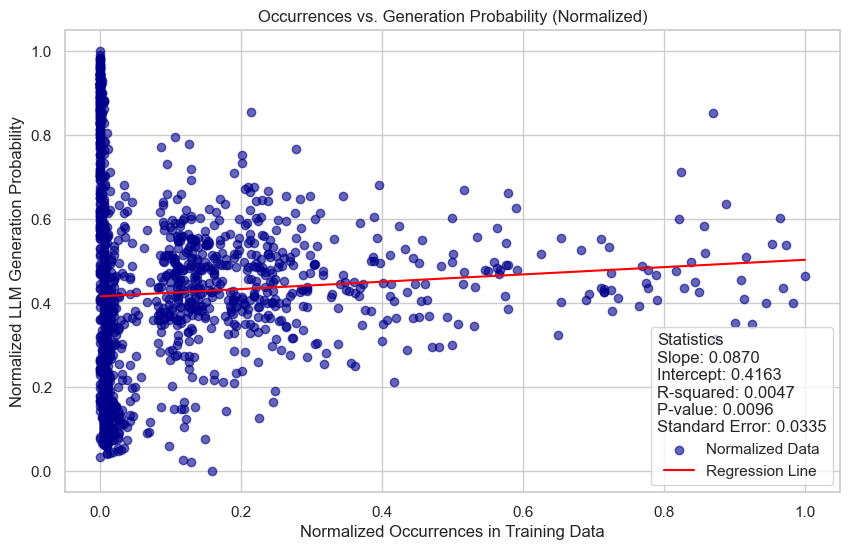

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress



# Extract x and y values
x_vals = np.array([item[0] for item in data.values()])
y_vals = np.array([item[1] for item in data.values()])

# Define a threshold to remove outliers based on the standard deviation
threshold = 2.5  # Points beyond 2.5 standard deviations are considered outliers

# Identify non-outlier indices for both x and y values
x_zscores = (x_vals - x_vals.mean()) / x_vals.std()
y_zscores = (y_vals - y_vals.mean()) / y_vals.std()
non_outlier_indices = (np.abs(x_zscores) < threshold) & (np.abs(y_zscores) < threshold)

# Filter out outliers
x_vals_filtered = x_vals[non_outlier_indices]
y_vals_filtered = y_vals[non_outlier_indices]

# Normalize x and y values
x_vals_normalized = (x_vals_filtered - x_vals_filtered.min()) / (x_vals_filtered.max() - x_vals_filtered.min())
y_vals_normalized = (y_vals_filtered - y_vals_filtered.min()) / (y_vals_filtered.max() - y_vals_filtered.min())

# Linear regression on normalized and filtered data
slope, intercept, r_value, p_value, std_err = linregress(x_vals_normalized, y_vals_normalized)

# Regression parameters
regression_params = {
    "Slope": slope,
    "Intercept": intercept,
    "R-squared": r_value**2,
    "P-value": p_value,
    "Standard Error": std_err
}

# Plotting the normalized data and regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_vals_normalized, y_vals_normalized, color='darkblue', alpha=0.6, label='Normalized Data')
plt.plot(x_vals_normalized, intercept + slope * x_vals_normalized, color='red', label='Regression Line')

# Add labels, title, and legend
plt.title('Occurrences vs. Generation Probability (Normalized)')
plt.xlabel('Normalized Occurrences in Training Data')
plt.ylabel('Normalized LLM Generation Probability')
plt.legend(title="Statistics")
plt.grid(True)

# Add regression parameters to the legend
legend_text = "\n".join([f"{key}: {value:.4f}" for key, value in regression_params.items()])
plt.gca().legend(title="Statistics\n" + legend_text)
plt.savefig('pics/analysis_regression.png')
plt.savefig('pics/analysis_regression.pdf')
plt.show()

